In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y')

In [3]:
import os
os.chdir(r'C:\Users\alswo\Desktop\논문\박종필 교수님\데이터\biz\분기별')

In [4]:
ice_cream_heater_df = pd.read_excel('ICT.xlsx', parse_dates=[0], index_col=0, squeeze=True)

In [5]:
ice_cream_heater_df

,GDP,기술기반업종 창업 수
분기,,
2016-01-01,428888.3,49636
2016-04-01,435080.7,47785
2016-07-01,434615.3,45330
2016-10-01,442195.3,47923
2017-01-01,450043.3,54107
2017-04-01,454400.0,48037
2017-07-01,467937.3,50061
2017-10-01,463317.6,46706
2018-01-01,467865.8,56129


In [6]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [8]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2012, 2019):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

KeyError: 'ice cream'

<Figure size 864x432 with 0 Axes>

In [9]:
avgs = ice_cream_heater_df.mean()  ## 평균
devs = ice_cream_heater_df.std()   ## 표준편차

In [10]:
## (값 - 평균) / 표준편차  ->  값이 평균과 얼마나 떨어져 있는지
## 데이터 간의 편차가 줄어듦
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

In [11]:
## 차분
ice_cream_heater_df = ice_cream_heater_df.diff().dropna()

In [12]:
ice_cream_heater_df

,GDP,기술기반업종 창업 수
분기,,
2016-04-01,0.339301,-0.433785
2016-07-01,-0.025501,-0.575334
2016-10-01,0.415332,0.607675
2017-01-01,0.430017,1.449232
2017-04-01,0.238717,-1.422516
2017-07-01,0.741752,0.474328
2017-10-01,-0.253128,-0.786251
2018-01-01,0.249210,2.208298
2018-04-01,0.276497,-1.093252


In [13]:
os.getcwd()

'C:\\Users\\alswo\\Desktop\\논문\\박종필 교수님\\데이터\\biz\\분기별'

In [14]:
ice_cream_heater_df.to_excel('ICT_pre.xlsx', encoding = 'utf8')

In [15]:
annual_volatility = ice_cream_heater_df.std()

In [16]:
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()

In [17]:
annual_volatility

,GDP,기술기반업종 창업 수
분기,,
2016,0.235653,0.646037
2017,0.416854,1.284091
2018,0.207872,1.470247
2019,0.260951,0.830523
2020,0.626121,0.737595


In [18]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']

KeyError: 'ice cream'

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


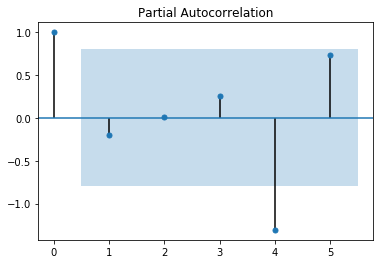

In [36]:
plot_pacf(ice_cream_heater_df['창업동아리 참여 수'])
plt.show()
### 444354

In [19]:
for lag in range(1, 7):
    heater_series = ice_cream_heater_df['GDP (십억원)'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['창업동아리 참여 수'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

KeyError: 'GDP (십억원)'

In [20]:
ice_cream_heater_df

,GDP,기술기반업종 창업 수
분기,,
2016-04-01,0.339301,-0.433785
2016-07-01,-0.025501,-0.575334
2016-10-01,0.415332,0.607675
2017-01-01,0.430017,1.449232
2017-04-01,0.238717,-1.422516
2017-07-01,0.741752,0.474328
2017-10-01,-0.253128,-0.786251
2018-01-01,0.249210,2.208298
2018-04-01,0.276497,-1.093252


In [45]:
model = VAR(ice_cream_heater_df)

In [52]:
model_fit = model.fit(maxlags = 1)

In [53]:
model_fit.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\Users\alswo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\alswo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\alswo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 20, Feb, 2021
Time:                     14:28:02
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -455.734
Nobs:                     5.00000    HQIC:                  -461.259
Log likelihood:           1130.57    FPE:               7.49438e-200
AIC:                     -452.453    Det(Omega_mle):    2.03113e-202
--------------------------------------------------------------------
Results for equation GDP (십억원)
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.200083              NAN              NAN             NAN
L1.GDP (십억원)           0.116671              NAN              NAN             NAN
L1.정부지원금 (백만원)         0.207061              NAN    

In [75]:
os.chdir(r'C:\Users\alswo\Desktop\논문\박종필 교수님\데이터\biz\분기별')

In [76]:
ICT = pd.read_excel('ICT.xlsx')
ICT

,분기,GDP,기술기반업종 창업 수
0,2016-01-01,428888.3,49636
1,2016-04-01,435080.7,47785
2,2016-07-01,434615.3,45330
3,2016-10-01,442195.3,47923
4,2017-01-01,450043.3,54107
5,2017-04-01,454400.0,48037
6,2017-07-01,467937.3,50061
7,2017-10-01,463317.6,46706
8,2018-01-01,467865.8,56129
9,2018-04-01,472912.0,51464


In [77]:
ICT.index = ICT['분기']
del ICT['분기']

In [78]:
ICT

,GDP,기술기반업종 창업 수
분기,,
2016-01-01,428888.3,49636
2016-04-01,435080.7,47785
2016-07-01,434615.3,45330
2016-10-01,442195.3,47923
2017-01-01,450043.3,54107
2017-04-01,454400.0,48037
2017-07-01,467937.3,50061
2017-10-01,463317.6,46706
2018-01-01,467865.8,56129


In [71]:
avgs = ICT.mean()  ## 평균
devs = ICT.std()   ## 표준편차
## (값 - 평균) / 표준편차  ->  값이 평균과 얼마나 떨어져 있는지
## 데이터 간의 편차가 줄어듦
for col in ICT.columns:
    ICT[col] = (ICT[col] - avgs.loc[col]) / devs.loc[col]
## 차분
ICT = ICT.diff().dropna()

In [72]:
ICT

,GDP,ICT_GDP
분기,,
2016-04-01,0.339301,0.402300
2016-07-01,-0.025501,0.353799
2016-10-01,0.415332,-0.121548
2017-01-01,0.430017,0.021983
2017-04-01,0.238717,-0.128547
2017-07-01,0.741752,0.697740
2017-10-01,-0.253128,0.367699
2018-01-01,0.249210,0.242208
2018-04-01,0.276497,-0.231759


In [79]:
model = VAR(ICT)
model_fit = model.fit(maxlags = 2)
model_fit.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Feb, 2021
Time:                     17:02:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    33.9384
Nobs:                     17.0000    HQIC:                   33.4970
Log likelihood:          -322.554    FPE:                3.48292e+14
AIC:                      33.4483    Det(Omega_mle):     2.07968e+14
--------------------------------------------------------------------
Results for equation GDP
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const              93319.356379     41950.827903            2.224           0.026
L1.GDP                 0.603361         0.282551            2.135           0.033
L1.기술기반업종 창업 수         0.034940         0.452908          

In [26]:
os.chdir(r'C:\Users\alswo\Desktop\논문\박종필 교수님\데이터\biz\전처리 완료')
df_biz = pd.read_csv('biz_VAR_handf.csv')

In [27]:
df_biz

,연도,GDP (십억원),정부지원금 (백만원),창업강좌 개설 수,창업강좌 이수학생 수,창업동아리 수,창업동아리 참여 수
0,2012,1440111,19460,3050,159456,1933,22730
1,2013,1500819,27495,7131,232031,2782,32573
2,2014,1562929,29072,4751,217734,3690,37407
3,2015,1658020,33483,4262,289886,4380,38588
4,2016,1740780,99869,10461,385571,5468,45387
5,2017,1835698,138138,11828,410033,5594,41440
6,2018,1898193,105134,13905,447263,5711,43923


In [135]:
df_biz.index = df_biz['연도']
del df_biz['연도']
df_biz

,GDP (십억원),정부지원금 (백만원),창업강좌 개설 수,창업강좌 이수학생 수,창업동아리 수,창업동아리 참여 수
연도,,,,,,
2012,1440111,19460,3050,159456,1933,22730
2013,1500819,27495,7131,232031,2782,32573
2014,1562929,29072,4751,217734,3690,37407
2015,1658020,33483,4262,289886,4380,38588
2016,1740780,99869,10461,385571,5468,45387
2017,1835698,138138,11828,410033,5594,41440
2018,1898193,105134,13905,447263,5711,43923


In [129]:
avgs = df_biz.mean()  ## 평균
devs = df_biz.std()   ## 표준편차
## (값 - 평균) / 표준편차  ->  값이 평균과 얼마나 떨어져 있는지
## 데이터 간의 편차가 줄어듦
for col in df_biz.columns :
    df_biz[col] = (df_biz[col] - avgs.loc[col]) / devs.loc[col]
## 차분
df_biz = df_biz.diff().dropna()
df_biz

,GDP (십억원),정부지원금 (백만원),창업강좌 개설 수,창업강좌 이수학생 수,창업동아리 수,창업동아리 참여 수
연도,,,,,,
2013,0.353248,0.166700,0.974100,0.662025,0.570817,1.266206
2014,0.361406,0.032718,-0.568086,-0.130417,0.610485,0.621847
2015,0.553316,0.091514,-0.116720,0.658167,0.463915,0.151924
2016,0.481564,1.377294,1.479648,0.872834,0.731506,0.874625
2017,0.552309,0.793957,0.326291,0.223141,0.084715,-0.507743
2018,0.363646,-0.684726,0.495762,0.339610,0.078664,0.319414


In [136]:
model = VAR(df_biz)
model_fit = model.fit(maxlags = 1)
model_fit.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 20, Feb, 2021
Time:                     19:26:45
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -279.082
Nobs:                     6.00000    HQIC:                  -283.460
Log likelihood:           823.792    FPE:               1.07838e-120
AIC:                     -277.624    Det(Omega_mle):    1.04237e-122
--------------------------------------------------------------------
Results for equation GDP (십억원)
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.053876         0.044982            1.198           0.231
L1.GDP (십억원)           0.871622         0.000000     37675671.991           0.000
L1.정부지원금 (백만원)         2.953605         0.000000    

### 모든 직종

In [292]:
os.chdir(r'C:\Users\alswo\Desktop\논문\박종필 교수님\데이터\biz\분기별')
df_allbiz = pd.read_excel('업종별창업_trans.xlsx', encoding = 'cp949')
df_allbiz.index = df_allbiz['분기']
del df_allbiz['분기']
df_allbiz

,GDP,경북,경남
분기,,,
2016.25,428888.3,13481,17722
2016.50,435080.7,14169,18729
2016.75,434615.3,13222,18008
2017.00,442195.3,14076,19859
2017.25,450043.3,15028,19544
2017.50,454400.0,14090,18538
2017.75,467937.3,14104,18560
2018.00,463317.6,13729,16888
2018.25,467865.8,15243,19564


In [293]:
model = VAR(df_allbiz)
model_fit = model.fit(maxlags = 4)
model_fit.summary()

C:\Users\alswo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Feb, 2021
Time:                     20:12:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    7.57666
Nobs:                     15.0000    HQIC:                   5.71612
Log likelihood:          -67.8702    FPE:                    4688.64
AIC:                      5.73573    Det(Omega_mle):        -491.494
--------------------------------------------------------------------
Results for equation GDP
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const     390323.033269    112656.688259            3.465           0.001
L1.GDP         0.248308         0.424972            0.584           0.559
L1.경북          2.190020         3.781931            0.579           0.563
L1.경남         -3

In [190]:
avgs = df_allbiz.mean()  ## 평균
devs = df_allbiz.std()   ## 표준편차
## (값 - 평균) / 표준편차  ->  값이 평균과 얼마나 떨어져 있는지
## 데이터 간의 편차가 줄어듦
for col in df_allbiz.columns :
    df_allbiz[col] = (df_allbiz[col] - avgs.loc[col]) / devs.loc[col]


,GDP,30~39,30under
분기,,,
2016.50,0.339301,-0.744749,0.043806
2016.75,-0.025501,-0.903230,0.098563
2017.00,0.415332,0.806812,0.710752
2017.25,0.430017,1.982674,-0.185080
2017.50,0.238717,-2.363914,-0.331830
2017.75,0.741752,0.402298,0.658185
2018.00,-0.253128,-0.854467,0.014237
2018.25,0.249210,2.789485,0.096373
2018.50,0.276497,-1.717800,-0.048187


In [213]:
## 차분
df_allbiz = df_allbiz.diff().dropna()
df_allbiz

,GDP,ictmen,ictwomen
분기,,,
2016.50,6192.4,6320.0,12539.0
2016.75,-465.4,-3301.0,-7443.0
2017.00,7580.0,6375.0,9000.0
2017.25,7848.0,3068.0,459.0
2017.50,4356.7,-1224.0,3617.0
2017.75,13537.3,1316.0,-1262.0
2018.00,-4619.7,-10392.0,-10091.0
2018.25,4548.2,28103.0,31619.0
2018.50,5046.2,-18119.0,-18791.0


In [236]:
df = pd.read_excel('지역별_·_업종별_창업기업수_20210225193950.xlsx')
df

,업종별(1),업종별(2),지역별(1),2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4
0,합계,소계,소계,285443,304621,292337,307776,317770,318607,321547,...,321940,330627,321748,320740,302834,339937,462991,346608,343128,331940
1,NaN,NaN,서울,57946,61597,60100,60974,63843,63276,63611,...,70771,69255,64308,64183,61833,72646,100190,69925,71952,67829
2,NaN,NaN,부산,17361,18737,17727,18617,19619,18937,19399,...,17028,17890,19065,18348,16957,19762,26984,20737,19419,19457
3,NaN,NaN,대구,12516,12469,11784,13155,13196,12520,12899,...,12060,12614,13248,12885,11855,13457,17236,12992,12750,12804
4,NaN,NaN,인천,16234,18337,16520,17436,17344,21013,19196,...,18565,19657,18706,19585,20286,21142,30690,22975,22626,20768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,NaN,NaN,전북,397,449,415,420,473,503,467,...,430,444,495,504,383,495,478,515,462,428
338,NaN,NaN,전남,362,432,378,375,451,445,415,...,406,426,490,489,402,427,481,507,433,509
339,NaN,NaN,경북,568,616,568,600,577,621,581,...,614,592,676,679,549,593,608,578,599,629
340,NaN,NaN,경남,808,867,710,800,849,859,881,...,756,763,875,890,757,853,834,816,817,894


In [237]:
df = df.transpose()
df.to_excel('지역별_·_업종별_창업기업수_trans.xlsx', encoding = 'utf8')